In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fig_path = "C:\\Users\\mwaugh\\github\\perla_tonetti_waugh\\Figures"
# Change this to reflect where the local repository is...

This reads in the data from the `julia` code. There should be two csv files, one of the transtion path, another for the stuff in the initial stationary eq.

In [145]:
df = pd.read_csv("solve-transition-results.csv")
df_stationary = pd.read_csv("stationary_results.csv")

In [146]:
df.head(10)

,t,g,z_hat,Ω,E,v_0,L_tilde,entry_residual,λ_ii,S,z_bar,c,π_min,log_M,U
0,0.000000,0.017337,1.705751,1.434682,0.007239,2.963191,0.249257,-0.013009,0.772752,0.123218,2.253724,1.691968,0.166556,0.000000,89.510594
1,4.577083,0.017999,1.697513,1.417039,0.007354,2.971494,0.250267,-0.004706,0.771771,0.125304,2.241247,1.680336,0.167258,0.080867,94.285742
2,10.540026,0.018594,1.688997,1.396808,0.007844,2.976075,0.252527,-0.000125,0.770749,0.127179,2.226665,1.664371,0.167846,0.189965,100.491209
3,16.502969,0.019078,1.682422,1.380875,0.008274,2.978264,0.254499,0.002064,0.769954,0.128705,2.215071,1.651339,0.168279,0.302281,106.629860
4,27.000000,0.019504,1.675443,1.361572,0.009158,2.976808,0.257964,0.000608,0.769104,0.130049,2.200749,1.633034,0.168587,0.504777,117.088284
5,46.200000,0.019771,1.671476,1.350007,0.009747,2.977282,0.260304,0.001082,0.768619,0.130892,2.192075,1.621470,0.168721,0.881820,133.853545
6,55.800000,0.019817,1.670631,1.347561,0.009881,2.976964,0.260797,0.000764,0.768515,0.131037,2.190236,1.619030,0.168750,1.071845,140.278821
7,65.400000,0.019887,1.669925,1.346074,0.009892,2.977356,0.260905,0.001156,0.768429,0.131257,2.189150,1.617990,0.168809,1.262427,144.686523
8,70.200000,0.019884,1.669881,1.345578,0.009954,2.976622,0.261133,0.000422,0.768423,0.131248,2.188755,1.617199,0.168787,1.357878,145.914229
9,72.600000,0.019880,1.669901,1.345467,0.009977,2.976363,0.261214,0.000163,0.768426,0.131234,2.188661,1.616951,0.168776,1.405595,146.238644


In [147]:
df = df[["t", "g", "λ_ii", "c", "L_tilde", "Ω"]]

Now we need to do a bit of pandas jujitsu to add the stationary part to the transition path...first replicate the one row data frame, create a new time period, replace the old time

In [148]:
extra_periods = 5;

df_stationary = pd.concat([df_stationary]*extra_periods, ignore_index=True)

In [149]:
df_stationary["t_hat"] = [-20, -15, -10, -5, -1]  

In [150]:
df_stationary.drop(["t"],axis = 1, inplace = True)

In [151]:
df_stationary.rename(columns={"t_hat": "t"},inplace = True)

In [152]:
df_stationary

,g,λ_ii,c,L_tilde,Ω,t
0,0.016591,0.807445,1.639007,0.25661,1.434682,-20
1,0.016591,0.807445,1.639007,0.25661,1.434682,-15
2,0.016591,0.807445,1.639007,0.25661,1.434682,-10
3,0.016591,0.807445,1.639007,0.25661,1.434682,-5
4,0.016591,0.807445,1.639007,0.25661,1.434682,-1


Then append this to the transition path.

In [153]:
df = df.append(df_stationary, ignore_index=True, sort=True)


In [154]:
df = df.sort_values(by=['t'])

df.reset_index(inplace = True)

df.drop(["index"], axis=1, inplace = True)

In [155]:
df.head(10)

,L_tilde,c,g,t,Ω,λ_ii
0,0.256610,1.639007,0.016591,-20.000000,1.434682,0.807445
1,0.256610,1.639007,0.016591,-15.000000,1.434682,0.807445
2,0.256610,1.639007,0.016591,-10.000000,1.434682,0.807445
3,0.256610,1.639007,0.016591,-5.000000,1.434682,0.807445
4,0.256610,1.639007,0.016591,-1.000000,1.434682,0.807445
5,0.249257,1.691968,0.017337,0.000000,1.434682,0.772752
6,0.250267,1.680336,0.017999,4.577083,1.417039,0.771771
7,0.252527,1.664371,0.018594,10.540026,1.396808,0.770749
8,0.254499,1.651339,0.019078,16.502969,1.380875,0.769954
9,0.257964,1.633034,0.019504,27.000000,1.361572,0.769104


Then we can plot stuff now...

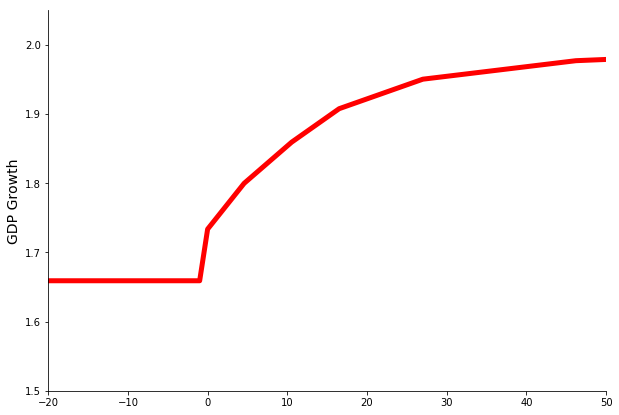

In [174]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*df.g, color = "red", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("GDP Growth", fontsize = 14) 
ax.set_xlim(-20,50)
ax.set_ylim(1.50,2.05)

plt.savefig(fig_path + "\\growth.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

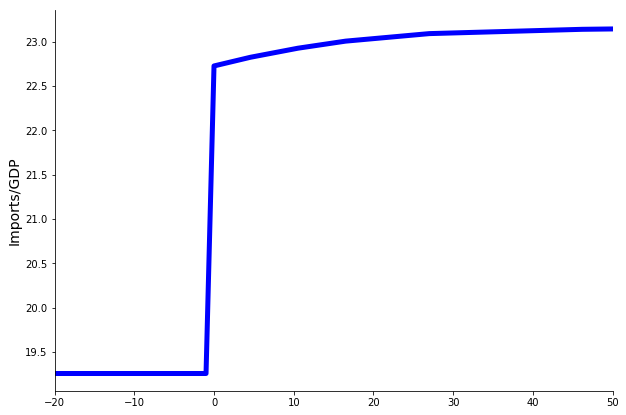

In [175]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, 100*(1-df.λ_ii), color = "blue", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Imports/GDP", fontsize = 14) 
ax.set_xlim(-20,50)

plt.savefig(fig_path + "\\trade.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

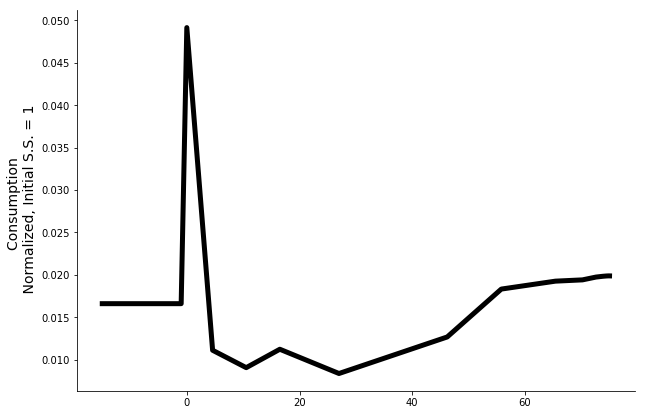

In [53]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.g + np.log(df.c).diff(), color = "black", lw = 5,
        label = "Growth Rate", ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Consumption \n Normalized, Initial S.S. = 1", fontsize = 14) 

#ax.set_ylim(0.98,1.04)

#ax.set_xlim(-20,75)

plt.savefig(fig_path + "\\consumption.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

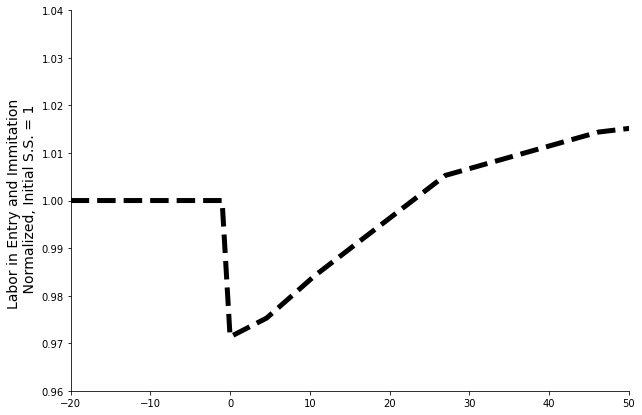

In [179]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.L_tilde/df.L_tilde.iloc[0], color = "black", lw = 5,
        label = "Growth Rate", ls = "--")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Labor in Entry and Immitation \n Normalized, Initial S.S. = 1", fontsize = 14) 

ax.set_ylim(0.96,1.04)

ax.set_xlim(-20,50)

plt.savefig(fig_path + "\\labor.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

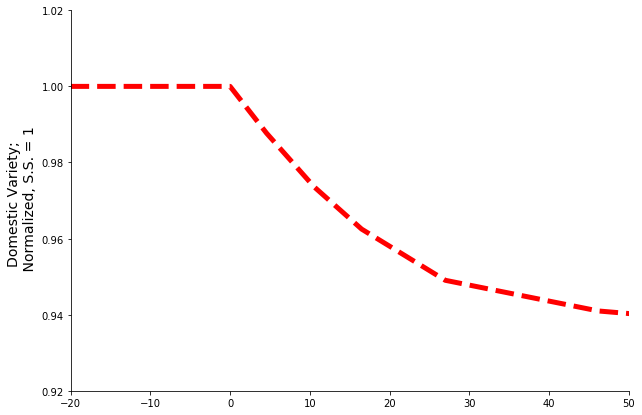

In [180]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.Ω/df.Ω.iloc[0], color = "red", lw = 5,
        label = "", ls = "-")

ax.plot(df.t, df.c/df.c.iloc[0], color = "blue", lw = 5, ls = "-")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Domestic Variety; \n Normalized, S.S. = 1", fontsize = 14) 

ax.set_ylim(0.92,1.05)

ax.set_xlim(-20,50)

#plt.savefig(fig_path + "\\us_trade_deficit.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

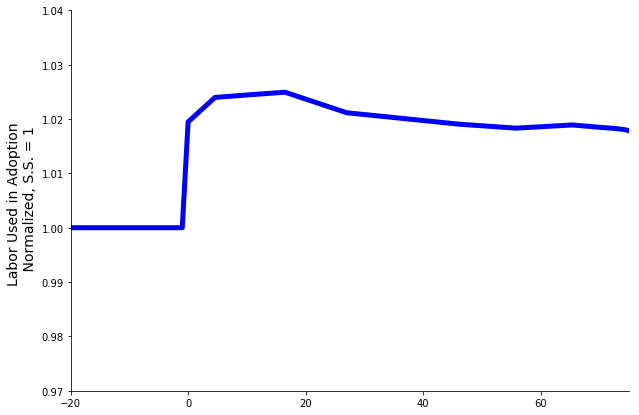

In [55]:
fig, ax = plt.subplots(figsize = (10,7))

ax.plot(df.t, df.L_tilde_a/df.L_tilde_a.iloc[0], color = "blue", lw = 5, ls = "-")

#ax.plot(df.t, df.L_tilde_E/df.L_tilde_E.iloc[0], color = "red", lw = 5, ls = "-")

#
#ax.plot(df.t, df.L_tilde/df.L_tilde.iloc[0], color = "black", lw = 5, ls = "--", alpha = 0.20)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.set_ylabel("Labor Used in Adoption \n Normalized, S.S. = 1", fontsize = 14) 

ax.set_ylim(0.97,1.04)

ax.set_xlim(-20,75)

#ax2 = ax.twinx() 

#ax2.plot(df.t, df.L_tilde_E/df.L_tilde_E.iloc[0], color = "black", lw = 5, ls = "-")

#ax2.set_ylim(0.65,1.47)

#plt.savefig(fig_path + "\\adoption_only.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

This is an interesting figure. It is showing the amount of labor allocated to adoption. The issue here is that it jumps: So